In [2]:
import numpy, pandas
import matplotlib
import matplotlib.pyplot as plt

## Figure 1(a) - description of observed genetic variation in pncA

In [3]:
MUTATIONS_CORE = pandas.read_csv('data/source-data/cryptic1-mutations.csv')
MUTATIONS_CORE.set_index('UNIQUEID', inplace=True)
print("%i samples have one or more mutations in pncA" % (len(MUTATIONS_CORE.index.unique())))

DST_CORE = pandas.read_csv('data/source-data/cryptic1-dst.csv')
DST_CORE.set_index('UNIQUEID', inplace=True)
MUTATIONS_CORE = MUTATIONS_CORE.join(DST_CORE[['PHENOTYPE']], how='left')

6851 samples have one or more mutations in pncA


In [4]:
MUTATIONS_CORE.reset_index(inplace=True)
variants_per_sample = MUTATIONS_CORE[['UNIQUEID','POSITION']].groupby('UNIQUEID').count()
MUTATIONS_CORE.set_index('UNIQUEID', inplace=True)
variants_per_sample.POSITION.value_counts()

1    6622
2     228
3       1
Name: POSITION, dtype: int64

In [5]:
multi_variant_samples = variants_per_sample[variants_per_sample.POSITION>1].index
MUTATIONS_CORE.loc[multi_variant_samples].MUTATION.value_counts()[:10]

S65S         197
a-11g         18
H57D           7
398_indel      7
471_indel      5
M175V          5
L4S            4
H51Q           4
V9G            4
S74S           4
Name: MUTATION, dtype: int64

In [6]:
solos = variants_per_sample[variants_per_sample.POSITION==1].index
SOLO_MUTATIONS = MUTATIONS_CORE.loc[solos]

def define_nonsense(row):
    if row.MUTATION[-1] == '!':
        return True
    else:
        return False

def define_missense(row):
    if not row.IS_NONSENSE and row.IS_NONSYNONYMOUS:
        return True
    else:
        return False66


SOLO_MUTATIONS['IS_NONSENSE'] = SOLO_MUTATIONS.apply(define_nonsense, axis=1)
SOLO_MUTATIONS['IS_MISSENSE'] = SOLO_MUTATIONS.apply(define_missense, axis=1)
SOLO_MUTATIONS[:3]

,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,...,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES,PHENOTYPE,IS_NONSENSE,IS_MISSENSE
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
site.00.subj.1000347.lab.H111540004.iso.1,pncA,Q141P,141.0,141.0,NaN,NaN,cag,ccg,True,False,...,GENE,AAM,NaN,NaN,NaN,00,1,R,False,True
site.00.subj.1000595.lab.H123460044.iso.1,pncA,D12A,12.0,12.0,NaN,NaN,gac,gcc,True,False,...,GENE,AAM,NaN,NaN,NaN,00,1,S,False,True
site.00.subj.1004213.lab.H111060034.iso.1,pncA,392_indel,392.0,131.0,2288850.0,392.0,NaN,NaN,False,True,...,GENE,INDEL,2.0,392_ins,392_ins_2,00,0,R,False,False


In [7]:
n = len(SOLO_MUTATIONS)
n_indel = len(SOLO_MUTATIONS[SOLO_MUTATIONS.IS_INDEL])
n_syn = len(SOLO_MUTATIONS[SOLO_MUTATIONS.IS_SYNONYMOUS])
n_promoter = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IN_PROMOTER)])
n_missense = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IS_MISSENSE)])
n_nonsense = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IS_NONSENSE)])
print(n_promoter, n_syn, n_missense, n_nonsense, n_indel)
print("%.3f %.3f %.3f %.3f %.3f" % (n_promoter/n, n_syn/n, n_missense/n, n_nonsense/n, n_indel/n ))

167 3288 2691 75 401
0.025 0.497 0.406 0.011 0.061


In [8]:
SOLO_MUTATIONS.PHENOTYPE.value_counts()

S    4079
R    2543
Name: PHENOTYPE, dtype: int64

In [9]:
n = len(SOLO_MUTATIONS)
n_indel_r = len(SOLO_MUTATIONS[SOLO_MUTATIONS.IS_INDEL & (SOLO_MUTATIONS.PHENOTYPE=='R')])
n_syn_r = len(SOLO_MUTATIONS[SOLO_MUTATIONS.IS_SYNONYMOUS & (SOLO_MUTATIONS.PHENOTYPE=='R')])
n_promoter_r = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IN_PROMOTER) & (SOLO_MUTATIONS.PHENOTYPE=='R')])
n_missense_r = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IS_MISSENSE) & (SOLO_MUTATIONS.PHENOTYPE=='R')])
n_nonsense_r = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IS_NONSENSE) & (SOLO_MUTATIONS.PHENOTYPE=='R')])
print(n_promoter_r, n_syn_r, n_missense_r, n_nonsense_r, n_indel_r)
print("%.3f %.3f %.3f %.3f %.3f" % (n_promoter_r/n_promoter, n_syn_r/n_syn, n_missense_r/n_missense, n_nonsense_r/n_nonsense, n_indel_r/n_indel ))

136 26 1970 68 343
0.814 0.008 0.732 0.907 0.855


In [38]:
foo = SOLO_MUTATIONS[SOLO_MUTATIONS.IS_INDEL]
foo['INFRAME'] = foo.INDEL_LENGTH % 3 == 0
pandas.crosstab(foo.PHENOTYPE, foo.INFRAME)

/var/folders/84/9nb2gsqj4hlcxztvwf19wg680000gq/T/ipykernel_35917/2920940619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foo['INFRAME'] = foo.INDEL_LENGTH % 3 == 0


INFRAME,False,True
PHENOTYPE,,
R,300,43
S,48,10


In [40]:
foo[~foo.INFRAME]

,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,...,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES,PHENOTYPE,IS_NONSENSE,IS_MISSENSE,INFRAME
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
site.00.subj.1004213.lab.H111060034.iso.1,pncA,392_indel,392.0,131.0,2288850.0,392.0,NaN,NaN,False,True,...,INDEL,2.0,392_ins,392_ins_2,00,0,R,False,False,False
site.00.subj.1004213.lab.H112000008.iso.1,pncA,392_indel,392.0,131.0,2288850.0,392.0,NaN,NaN,False,True,...,INDEL,2.0,392_ins,392_ins_2,00,0,R,False,False,False
site.00.subj.1004213.lab.H113100007.iso.1,pncA,392_indel,392.0,131.0,2288850.0,392.0,NaN,NaN,False,True,...,INDEL,2.0,392_ins,392_ins_2,00,0,R,False,False,False
site.00.subj.1042407.lab.H112580018.iso.1,pncA,560_indel,560.0,187.0,2288682.0,560.0,NaN,NaN,False,True,...,INDEL,-163.0,560_del,560_del_163,00,0,R,False,False,False
site.00.subj.1122232.lab.H120660003.iso.1,pncA,196_indel,196.0,66.0,2289046.0,196.0,NaN,NaN,False,True,...,INDEL,1.0,196_ins,196_ins_1,00,0,R,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.ENA.subj.SAMN08709273.lab.1.iso.1,pncA,449_indel,449.0,150.0,2288793.0,449.0,NaN,NaN,False,True,...,INDEL,2.0,449_ins,449_ins_2,ENA,0,S,False,False,False
site.ENA.subj.SAMN08709300.lab.1.iso.1,pncA,287_indel,287.0,96.0,2288955.0,287.0,NaN,NaN,False,True,...,INDEL,1.0,287_ins,287_ins_1,ENA,0,R,False,False,False
site.ENA.subj.SAMN08892448.lab.1.iso.1,pncA,471_indel,471.0,157.0,2288771.0,471.0,NaN,NaN,False,True,...,INDEL,1.0,471_ins,471_ins_1,ENA,0,R,False,False,False


In [48]:
foo = SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SYNONYMOUS)]
foo[foo.PHENOTYPE=='R'].MUTATION.value_counts()

S65S     19
A46A      2
R2R       1
V131V     1
V155V     1
D63D      1
L19L      1
Name: MUTATION, dtype: int64

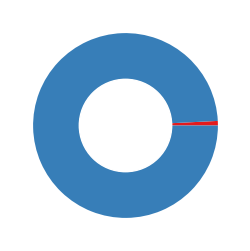

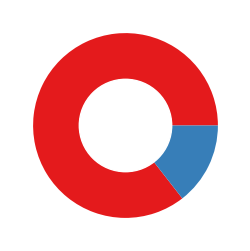

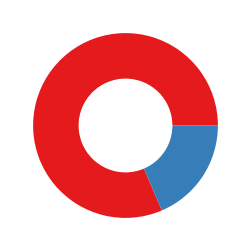

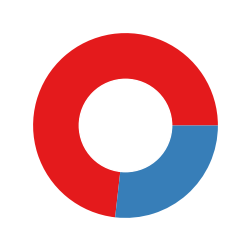

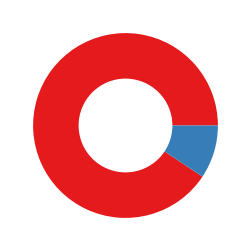

In [32]:
# create data

groups = {'syn': (n_syn_r,(n_syn-n_syn_r)),
          'indel': (n_indel_r,(n_indel-n_indel_r)),
          'promoter': (n_promoter_r,(n_promoter-n_promoter_r)),
          'missense': (n_missense_r,(n_missense-n_missense_r)),
          'nonsense': (n_nonsense_r,(n_nonsense-n_nonsense_r))
          }

colours = ['#e41a1c', '#377eb8']

size_of_groups=[n_syn_r,(n_syn-n_syn_r)]
size_of_groups=[n_missense_r,(n_missense-n_missense_r)]


for i in groups:

    size_of_groups = groups[i]    

    # Create a pieplot
    fig,axes=plt.subplots(1,1,figsize=(3,3))
    axes.pie(size_of_groups, colors=colours)

    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.5, color='white')
    fig.gca().add_artist(my_circle)
    fig.savefig('pdf/fig-donut-'+i+'.pdf',bbox_inches='tight',transparent=True)
    

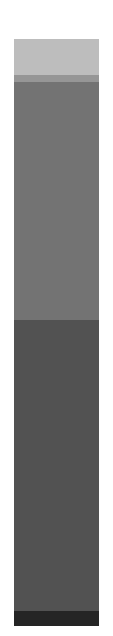

In [53]:
fig,axes=plt.subplots(1,1,figsize=(1.2,8))
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axis('off')
# axes.bar(1, n_promoter, width=1, color='#4a1486')
# axes.bar(1, n_syn, bottom=n_promoter, width=1, color='#6a51a3')
# axes.bar(1, n_missense, bottom=n_promoter+n_syn, width=1, color='#807dba')
# axes.bar(1, n_nonsense, bottom=n_promoter+n_syn+n_missense, width=1, color='#9e9ac8')
# axes.bar(1, n_indel, bottom=n_promoter+n_syn+n_missense+n_nonsense, width=1, color='#bcbddc')

axes.bar(1, n_promoter, width=1, color='#252525')
axes.bar(1, n_syn, bottom=n_promoter, width=1, color='#525252')
axes.bar(1, n_missense, bottom=n_promoter+n_syn, width=1, color='#737373')
axes.bar(1, n_nonsense, bottom=n_promoter+n_syn+n_missense, width=1, color='#969696')
axes.bar(1, n_indel, bottom=n_promoter+n_syn+n_missense+n_nonsense, width=1, color='#bdbdbd')

fig.savefig('pdf/fig-1_hist-variation.pdf',bbox_inches='tight',transparent=True)

DST_CORE = pandas.read_csv('data/source-data/cryptic1-dst.csv')
DST_CORE.set_index('UNIQUEID', inplace=True)


MUTATIONS_CORE = pandas.read_csv('data/source-data/cryptic1-mutations.csv')
MUTATIONS_CORE.set_index('UNIQUEID', inplace=True)
MUTATIONS_CORE = MUTATIONS_CORE.join(LINEAGES_CORE, how='left')

In [12]:

LINEAGES_CORE = pandas.read_csv('data/source-data/cryptic1-lineages.csv')
LINEAGES_CORE.set_index('UNIQUEID', inplace=True)
MUTATIONS_CORE = MUTATIONS_CORE.join(LINEAGES_CORE, how='left')

In [13]:
mutation_counts = MUTATIONS_CORE.MUTATION.value_counts()

df = MUTATIONS_CORE[MUTATIONS_CORE.MUTATION.isin(mutation_counts[mutation_counts>=3].index) & MUTATIONS_CORE.IS_SYNONYMOUS]

pandas.crosstab(df.MUTATION, df.MYKROBE_LINEAGE_NAME_1)

MYKROBE_LINEAGE_NAME_1,Lineage 3,Lineage 4,Lineage 5,Lineage Bovis,Mixed,Unknown
MUTATION,,,,,,
A38A,0,17,0,0,0,0
G75G,0,5,0,0,0,0
G97G,0,1,2,0,0,0
L117L,3,0,0,0,0,0
L35L,1,1,0,0,0,0
S65S,2872,0,0,0,21,1
S67S,2,0,0,0,0,0
S74S,0,0,0,1,0,0
T100T,2,0,0,0,0,0


Synonymous mutations S65S and A38A are entirely associated with different lineages and have n>10 so we will assume are lineage-associated and so can be ignored. This reduces the number of samples with >=1 mutation present.

In [14]:
MUTATIONS_CORE = MUTATIONS_CORE[~MUTATIONS_CORE.MUTATION.isin(['S65S','A38A'])]
MUTATIONS_CORE.reset_index(inplace=True)
MUTATIONS_CORE_COUNTS=MUTATIONS_CORE[['UNIQUEID','SITEID']].groupby('UNIQUEID').count()
MUTATIONS_CORE.set_index('UNIQUEID',inplace=True)
MUTATIONS_CORE_COUNTS.rename(columns={'SITEID':'N_MUTATIONS'},inplace=True)
MUTATIONS_CORE_COUNTS
MUTATIONS_CORE_COUNTS.N_MUTATIONS.value_counts()

1    3578
2      33
Name: N_MUTATIONS, dtype: int64

In [15]:
samples_with_mutations=set(MUTATIONS_CORE.index)
DST_CORE.loc[DST_CORE.index.isin(samples_with_mutations), 'HAS_MUTATION']=True
DST_CORE.HAS_MUTATION.fillna(False,inplace=True)
DST_CORE.HAS_MUTATION.value_counts()

False    19231
True      3611
Name: HAS_MUTATION, dtype: int64

In [16]:
df = pandas.crosstab(DST_CORE.HAS_MUTATION, DST_CORE.PHENOTYPE, margins=True)
df

PHENOTYPE,R,S,All
HAS_MUTATION,,,
False,684,18547,19231
True,2667,944,3611
All,3351,19491,22842


In [17]:
prop_R_mut = 100*df['R'][True] / df['All'][True]
prop_R_nomut = 100*df['R'][False] / df['All'][False]
print("%.1f %% of samples with a mutation are resistant, whilst only %.1f %% of samples without a mutation are resistant" % (prop_R_mut, prop_R_nomut))

73.9 % of samples with a mutation are resistant, whilst only 3.6 % of samples without a mutation are resistant


## Figure 1b -- possible genetic variation

In [18]:
with open('./data/reference/NC_000962.3_pncA.fasta','r') as INPUT:
    INPUT.readline()
    pncA_sequence = INPUT.readline()

In [19]:
aminoacids = 'FFLLSSSSYY!!CC!WLLLLPPPPHHQQRRRRIIIMTTTTNNKKSSRRVVVVAAAADDEEGGGG'
bases = ['t', 'c', 'a', 'g']
all_codons = numpy.array([a+b+c for a in bases for b in bases for c in bases])
codon_to_amino_acid = dict(zip(all_codons, aminoacids))

In [20]:
index = 1

maximum_amino_acids = []
amino_acid_position = []

for codon in [pncA_sequence[i:i+3] for i in range(0,len(pncA_sequence),3)]:
    
    aminoacid = codon_to_amino_acid[codon]
    mutations = []

    for pos in [0, 1, 2]:
        for i in bases:
            if codon[pos] != i:
                new_codon = codon[:pos] + i + codon[pos+1:]
                new_aminoacid = codon_to_amino_acid[new_codon]

                if new_aminoacid != aminoacid and new_aminoacid not in mutations and new_aminoacid!="!":
                    mutations.append(new_aminoacid)

    # print(index, len(mutations))

    maximum_amino_acids.append(len(mutations))
    amino_acid_position.append(index)
    
    index+=1

max_aa = pandas.DataFrame(maximum_amino_acids, index=amino_acid_position, columns=['MAX'])

In [21]:
DATASET = pandas.read_csv('data/ds-traintest-phen.csv')
DATASET[:3]

,MUTATION,CONSISTENT_PHENOTYPE
0,A102V,S
1,A134D,S
2,A134P,R


In [22]:
DATASET.reset_index(inplace=True)
def find_position(row):
    return int(row.MUTATION[1:-1])

DATASET['POSITION'] = DATASET.apply(find_position, axis=1)

In [23]:
total = pandas.crosstab(DATASET.POSITION, DATASET.CONSISTENT_PHENOTYPE)
total['TOTAL'] = total.R + total.S
total['frac_R'] = total['R'] / total['TOTAL']
total = total.join(max_aa)
total

,R,S,TOTAL,frac_R,MAX
POSITION,,,,,
1,2,1,3,0.666667,6
2,0,1,1,0.000000,5
3,1,2,3,0.333333,6
4,4,1,5,0.800000,5
5,5,1,6,0.833333,7
...,...,...,...,...,...
181,1,1,2,0.500000,6
182,1,1,2,0.500000,5
183,1,2,3,0.333333,6


In [24]:
xs=[0.5]
ys=[0]
yt=[0]

prev_idx=0
for idx,row in total.iterrows():
    if idx-prev_idx!=1:
        print(idx, prev_idx)
    if idx==151:
        xs.append(149.5)
        xs.append(150.5)
        ys.append(0)
        ys.append(0)
        yt.append(0)
        yt.append(0)
    prev_idx=idx
    xs.append(idx-0.5)
    xs.append(idx+0.5)
    ys.append(row.TOTAL)
    ys.append(row.TOTAL)
    yt.append(row.MAX)
    yt.append(row.MAX)

151 149


In [25]:
metal_binding_residues = [49,51,57,71]

active_site_residues = [8,13,19,68,96,133,134,137,138]

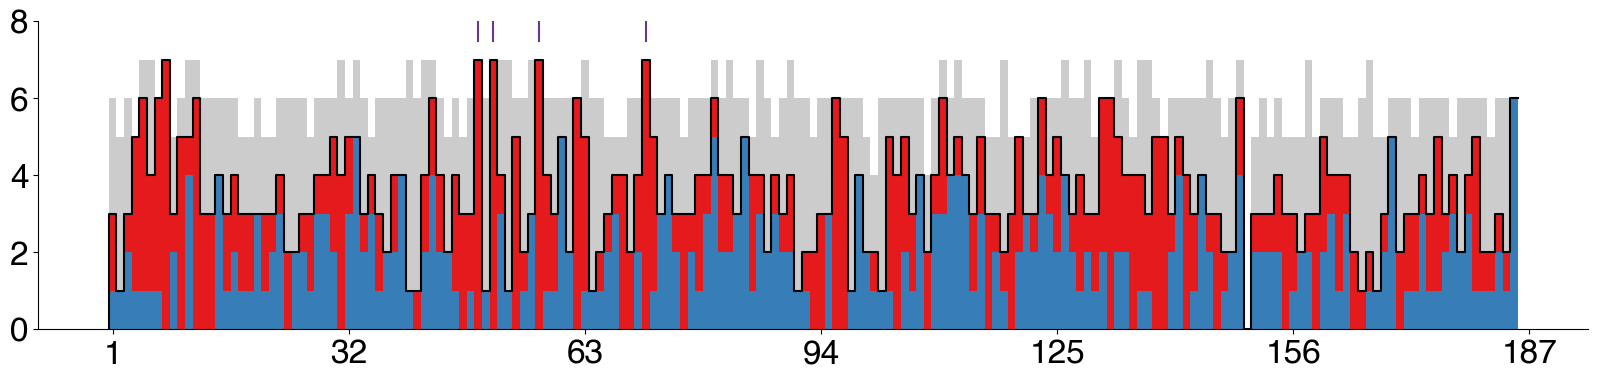

In [61]:
fig,axes=plt.subplots(1,1,figsize=(20,4))
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.set_ylim([0,7])
axes.set_yticks(range(0,10,2))
axes.set_xticks(range(1,188,31))
axes.bar(total.index, total.MAX, width=1, color='#cccccc')
axes.bar(total.index, total.S, width=1, color='#377eb8')
axes.bar(total.index, total.R, bottom=total.S, width=1, color='#e41a1c')
axes.plot(xs,ys, color='black')

# annotate the metal binding sites
for i in metal_binding_residues:
    axes.plot((i,i),(7.5,8.5), color='#68378b')

# for i in active_site_residues:
#     axes.plot((i,i),(7.5,8.5), color='#e4bad7')

matplotlib.rcParams.update({'font.size': 24})
# axes.plot(xs,yt, color='black')
fig.savefig('pdf/fig-1_hist-codon.pdf',bbox_inches='tight',transparent=True)

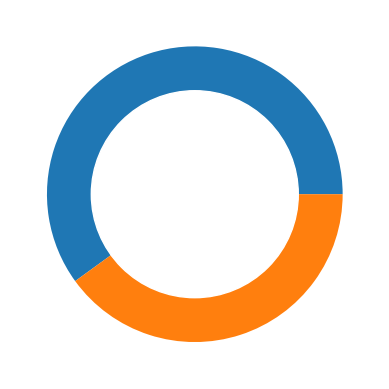

In [48]:
'resid ' + ' '.join(str(i) for i in metal_binding_residues)

'resid 49 51 57 71'

In [49]:
'resid ' + ' '.join(str(i) for i in active_site_residues)

'resid 8 13 19 68 96 133 134 137 138'

,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,...,IS_HET,IS_NULL,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
site.05.subj.PSLM-0791.lab.SLM-049.iso.1,pncA,L120P,120.0,120.0,NaN,NaN,ctg,ccg,True,False,...,False,False,True,GENE,AAM,NaN,NaN,NaN,05,1
site.05.subj.LR-2032.lab.FN-00407-15.iso.1,pncA,W119L,119.0,119.0,NaN,NaN,tgg,ttg,True,False,...,False,False,True,GENE,AAM,NaN,NaN,NaN,05,1
site.05.subj.PMK-1015.lab.MK-1781.iso.1,pncA,F58L,58.0,58.0,NaN,NaN,ttc,ctc,True,False,...,False,False,True,GENE,AAM,NaN,NaN,NaN,05,1


,UNIQUEID,DRUG,SOURCE,METHOD_1,METHOD_2,METHOD_3,METHOD_CC,METHOD_MIC,PHENOTYPE
0,site.24.subj.PT-2.lab.1997-606.iso.1,PZA,SEQTREAT2020,liquid media,MGIT,BACTEC460,100.0,NaN,S
1,site.24.subj.PT-4.lab.1998-151.iso.1,PZA,SEQTREAT2020,liquid media,MGIT,BACTEC460,100.0,NaN,S
2,site.24.subj.PT-5.lab.1998-713.iso.1,PZA,SEQTREAT2020,liquid media,MGIT,BACTEC460,100.0,NaN,S


In [51]:
len(DST)

22842

1    6622
2     228
3       1
Name: POSITION, dtype: int64

In [53]:
solos = variants_per_sample[variants_per_sample.POSITION==1].index
MUTATIONS.set_index('UNIQUEID', inplace=True)

SOLO_MUTATIONS = MUTATIONS.loc[solos]

def define_nonsense(row):
    if row.MUTATION[-1] == '!':
        return True
    else:
        return False

def define_missense(row):
    if not row.IS_NONSENSE and row.IS_NONSYNONYMOUS:
        return True
    else:
        return False


SOLO_MUTATIONS['IS_NONSENSE'] = SOLO_MUTATIONS.apply(define_nonsense, axis=1)
SOLO_MUTATIONS['IS_MISSENSE'] = SOLO_MUTATIONS.apply(define_missense, axis=1)
SOLO_MUTATIONS

,GENE,MUTATION,POSITION,AMINO_ACID_NUMBER,GENOME_INDEX,NUCLEOTIDE_NUMBER,REF,ALT,IS_SNP,IS_INDEL,...,IS_FILTER_PASS,ELEMENT_TYPE,MUTATION_TYPE,INDEL_LENGTH,INDEL_1,INDEL_2,SITEID,NUMBER_NUCLEOTIDE_CHANGES,IS_NONSENSE,IS_MISSENSE
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
site.00.subj.1000347.lab.H111540004.iso.1,pncA,Q141P,141.0,141.0,NaN,NaN,cag,ccg,True,False,...,True,GENE,AAM,NaN,NaN,NaN,00,1,False,True
site.00.subj.1000595.lab.H123460044.iso.1,pncA,D12A,12.0,12.0,NaN,NaN,gac,gcc,True,False,...,True,GENE,AAM,NaN,NaN,NaN,00,1,False,True
site.00.subj.1004213.lab.H111060034.iso.1,pncA,392_indel,392.0,131.0,2288850.0,392.0,NaN,NaN,False,True,...,True,GENE,INDEL,2.0,392_ins,392_ins_2,00,0,False,False
site.00.subj.1004213.lab.H112000008.iso.1,pncA,392_indel,392.0,131.0,2288850.0,392.0,NaN,NaN,False,True,...,True,GENE,INDEL,2.0,392_ins,392_ins_2,00,0,False,False
site.00.subj.1004213.lab.H113100007.iso.1,pncA,392_indel,392.0,131.0,2288850.0,392.0,NaN,NaN,False,True,...,True,GENE,INDEL,2.0,392_ins,392_ins_2,00,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site.ENA.subj.SAMN08892560.lab.1.iso.1,pncA,L4W,4.0,4.0,NaN,NaN,ttg,tgg,True,False,...,True,GENE,AAM,NaN,NaN,NaN,ENA,1,False,True
site.ENA.subj.SAMN08892561.lab.1.iso.1,pncA,S65S,65.0,65.0,NaN,NaN,tcc,tct,True,False,...,True,GENE,AAM,NaN,NaN,NaN,ENA,1,False,False
site.ENA.subj.SAMN08892562.lab.1.iso.1,pncA,S65S,65.0,65.0,NaN,NaN,tcc,tct,True,False,...,True,GENE,AAM,NaN,NaN,NaN,ENA,1,False,False


In [54]:
n_indel = len(SOLO_MUTATIONS[SOLO_MUTATIONS.IS_INDEL])
n_syn = len(SOLO_MUTATIONS[SOLO_MUTATIONS.IS_SYNONYMOUS])
n_promoter = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IN_PROMOTER)])
n_missense = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IS_MISSENSE)])
n_nonsense = len(SOLO_MUTATIONS[(SOLO_MUTATIONS.IS_SNP) & (SOLO_MUTATIONS.IS_NONSENSE)])
print(n_indel, n_syn, n_promoter, n_missense, n_nonsense)

401 3288 167 2691 75


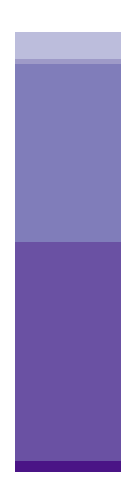

In [55]:
fig,axes=plt.subplots(1,1,figsize=(1.5,6))
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.spines['left'].set_visible(False)
axes.axis('off')
axes.bar(1, n_promoter, width=1, color='#4a1486')
axes.bar(1, n_syn, bottom=n_promoter, width=1, color='#6a51a3')
axes.bar(1, n_missense, bottom=n_promoter+n_syn, width=1, color='#807dba')
axes.bar(1, n_nonsense, bottom=n_promoter+n_syn+n_missense, width=1, color='#9e9ac8')
axes.bar(1, n_indel, bottom=n_promoter+n_syn+n_missense+n_nonsense, width=1, color='#bcbddc')
fig.savefig('pdf/fig-1_hist-variation.pdf')